**Advanced Machine Learning | SciPy Japan 2019 Tutorial | Alexandre Chabot-Lerclerc**
<br>
SRC : https://www.youtube.com/watch?v=4H7kg2l4lD8&feature=youtu.be&t=117

In [36]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [5]:
model = LinearSVC()
model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
model.score(iris.data,iris.target)

0.9666666666666667

In [10]:
model = LogisticRegression()
model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
model.score(iris.data,iris.target)

0.96

In [15]:
errors = iris.target!=predicted

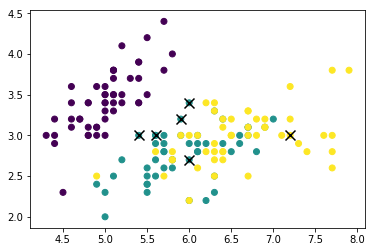

In [19]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.scatter(iris.data[errors,0],iris.data[errors,1],marker='x', c='black',s=100)
plt.show()

### Pipeline

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


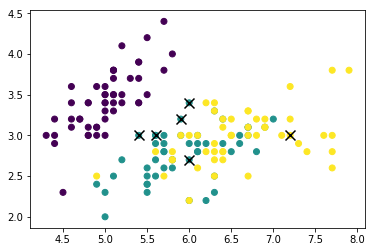

In [21]:
model = Pipeline([('clf',LogisticRegression())])

model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

errors = iris.target!=predicted

plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.scatter(iris.data[errors,0],iris.data[errors,1],marker='x', c='black',s=100)
plt.show()

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


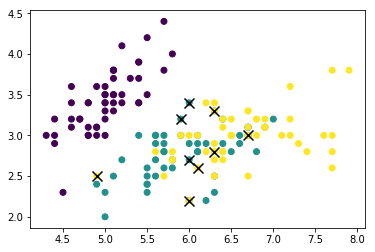

In [24]:
model = Pipeline([
    ('scalar',StandardScaler()),
    ('clf',LogisticRegression(penalty='l1'))
])

model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

errors = iris.target!=predicted

plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.scatter(iris.data[errors,0],iris.data[errors,1],marker='x', c='black',s=100)
plt.show()

## Grid Search CV

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


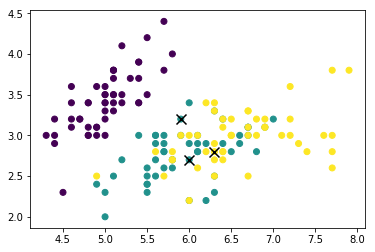

In [35]:
pipe = Pipeline([
    ('scalar',StandardScaler()),
    ('clf',LogisticRegression(penalty='l1'))
])

params={
    'clf__penalty':['l1','l2'],
    'clf__C':[0.001,0.01,0.1,1,10],
    'scalar__with_mean':[True,False],
    'scalar__with_std':[True,False]
}

model = GridSearchCV(pipe, params,cv=StratifiedKFold(5),n_jobs=2)


model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

errors = iris.target!=predicted

plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.scatter(iris.data[errors,0],iris.data[errors,1],marker='x', c='black',s=100)
plt.show()

In [31]:
model.best_params_

{'clf__C': 10,
 'clf__penalty': 'l1',
 'scalar__with_mean': False,
 'scalar__with_std': False}

In [32]:
model.best_score_

0.98

In [33]:
model.best_estimator_

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=False, with_std=False)), ('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

### Regularization

In [46]:
model = Lasso(alpha=0.1)
model.fit(iris.data[:,:-1],iris.data[:,:-1])
print(model.coef_)

[[ 0.6386558   0.          0.11545676]
 [ 0.          0.41961656 -0.0290911 ]
 [ 0.         -0.          0.96769507]]


## Feature Selection

In [47]:
from sklearn.feature_selection import SelectFromModel

In [48]:
iris=datasets.load_iris()

In [61]:
model = SelectFromModel(Lasso(alpha=0.1))

model.fit(iris.data,iris.target)

transformed_data = model.transform(iris.data)

print(f'before {iris.data.shape}')
print(f'after {transformed_data.shape}')

before (150, 4)
after (150, 1)


In [63]:
model.estimator_.coef_

array([ 0.        , -0.        ,  0.40811896,  0.        ])

In [64]:
model.estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Exercise Feature Selection

In [66]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [67]:
dataset = datasets.load_boston()
features = dataset.data
labels = dataset.target

In [68]:
random_state=0
x_train,x_test,y_train,y_test = train_test_split(
    features,
    labels,
    test_size = 0.3,
    random_state=42
)

In [80]:
pipe = Pipeline([
    ('select',SelectFromModel(Lasso())),
    ('regr',LinearRegression())
])

params = {
    'select__estimator__alpha':[0.001,0.01,0.1,1,10]
}

grid = GridSearchCV(pipe,params,cv=5,iid=False)

In [81]:
grid.fit(x_train,y_train)
grid.score(x_train,y_train)

0.7434997532004697

In [75]:
# select = pipe.named_steps['select']
# select.get_params()

{'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': False,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

In [79]:
SelectFromModel(Lasso()).get_params()

{'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': False,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}